In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/CSE251B/PA2/PA2_starter")

Mounted at /content/drive


In [ ]:
import util
!pip install Ipython --upgrade
%load_ext autoreload
%autoreload 2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.1/783.1 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: Ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.9.0 which is incompatible.


In [ ]:
%reload_ext autoreload

In [ ]:
train_normalized_images, train_one_hot_labels, val_normalized_images, val_one_hot_labels,  test_normalized_images, test_one_hot_labels = util.load_data("/content/drive/MyDrive/CSE251B/PA2/PA2_starter/data")

40000
(40000, 3072) (40000, 1) (10000, 3072) (10000, 1)
(40000, 3073) (40000, 20) (10000, 3073) (10000, 20) (10000, 3073) (10000, 20)


{'layer_specs': [3072, 128, 20], 'activation': 'tanh', 'learning_rate': 0.005, 'batch_size': 128, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0, 'momentum': True, 'momentum_gamma': 0.9, 'weight_type': 'random'}


In [ ]:
import yaml

with open("configs/config_3c.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

print(config)


import neuralnet

net = neuralnet.Neuralnetwork(config)
bs = 128
net.setBatchSize(bs)


print(config["layer_specs"])
patience = 0
prevLoss = float("inf")
bestLoss = float("inf")
bestWts = []
for i in range(config['epochs']):
  print("\n\nEPOCH:", i)
  miniXtrain = util.generate_minibatches((train_normalized_images,train_one_hot_labels), batch_size = bs) # Create minibatches of train set
  # print("jay bc",train_normalized_images.shape)
  for x,t in miniXtrain:
    net(x,t)
    # print("MINIBATCH OVER, Epoch number:",i,"\n\n")
  
  print("Training Accuracy & Loss of epoch", i)
  net.forward(train_normalized_images, train_one_hot_labels)

  print("Valid accuracy & loss of epoch", i)
  _, _, loss = net.forward(val_normalized_images, val_one_hot_labels)
  
  if loss > prevLoss:
    patience+=1
    print("This loss higher than before, increasing patience to",patience)
    if patience == 5:
      print("Khalas, my patience is up, Early Stopping & saving weights")
      break
  else:
    patience = 0
    
    if loss < bestLoss:
      bestLoss = loss
      bestWts = net.saveWts()
  prevLoss = loss
    
  


{'layer_specs': [3072, 128, 20], 'activation': 'tanh', 'learning_rate': 0.005, 'batch_size': 128, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0.01, 'momentum': True, 'momentum_gamma': 0.9, 'weight_type': 'random'}
[3072, 128, 20]


EPOCH: 0
Training Accuracy & Loss of epoch 0
20
[4, 7, 14, 7, 9, 16, 6, 9, 18, 7]
40000
Accuracy:  0.1914
Loss:  0.1348646551897884
Valid accuracy & loss of epoch 0
18
[16, 12, 2, 6, 10, 18, 17, 4, 2, 14]
10000
Accuracy:  0.1899
Loss:  0.13510126134010744


EPOCH: 1
Training Accuracy & Loss of epoch 1
20
[0, 7, 14, 7, 9, 16, 6, 9, 18, 7]
40000
Accuracy:  0.225325
Loss:  0.13017795271681895
Valid accuracy & loss of epoch 1
20
[16, 1, 2, 6, 1, 5, 17, 4, 2, 14]
10000
Accuracy:  0.2164
Loss:  0.13153789464061777


EPOCH: 2
Training Accuracy & Loss of epoch 2
20
[0, 7, 14, 7, 9, 8, 14, 18, 18, 7]
40000
Accuracy:  0.245825
Loss:  0.12685471062451711
Valid accuracy & loss of epoch 2
20
[16, 12, 2, 6, 1, 5, 17, 4, 2, 8]
10000
Accuracy:  0

In [ ]:
print(bestWts)

[array([[ 0.05677515,  0.24238329, -0.556401  , ..., -0.72539239,
        -0.06237972, -0.17145168],
       [-0.06859853, -0.1147091 ,  0.13139578, ..., -0.37604229,
        -0.17246501, -0.15372677],
       [-0.0661844 ,  0.12061835,  0.00271299, ..., -0.16544777,
        -0.11268249, -0.12914133],
       ...,
       [ 0.09055807, -0.02068029, -0.20132976, ...,  0.04643037,
         0.00705405,  0.18212614],
       [ 0.00165535, -0.01548151, -0.01800035, ..., -0.2232203 ,
         0.07559256, -0.08554075],
       [ 0.17294031, -0.00905576, -0.08527258, ...,  0.16293489,
        -0.05250886,  0.02192806]]), array([[ 0.28010435,  0.14627327,  0.08890502, ..., -0.0417555 ,
         0.14223867, -0.0563958 ],
       [-0.02849502, -0.01569641, -0.01913906, ...,  0.01576654,
        -0.01610406,  0.02688554],
       [-0.00942522, -0.02050095, -0.0148461 , ...,  0.00753154,
        -0.00865981,  0.01242285],
       ...,
       [ 0.00518957,  0.03252754, -0.01927447, ..., -0.01846388,
        

In [ ]:
_, _, loss = net.forward(test_normalized_images, test_one_hot_labels)

20
[9, 12, 0, 4, 10, 14, 3, 7, 10, 3]
10000
Accuracy:  0.2465
Loss:  0.1293412318198544


### Part b 

In [ ]:
trainb = train_normalized_images[469]
trainLb = train_one_hot_labels[469]
trainb = trainb.reshape((-1,len(trainb)))
trainLb = trainLb.reshape(-1,(len(trainLb)))
# net(trainb,trainLb)
epsilon = 10**-2
net = neuralnet.Neuralnetwork(config)


# self.w[10]  


numericals = net.partBnumAprx(trainb,trainLb,epsilon)

approxes = net.backward(True)

print(len(numericals[0]))
approxes = approxes[::-1]
print(len(approxes[0]))
for i in range(len(numericals)):
  print("Layer number:", i)
  print("numerical")
  print(numericals[i][0:5][0:2])
  print("approx")
  print(approxes[i][0:5][0:2])
  print("difference")
  print(np.subtract(numericals[i][0:5][0:2],approxes[i][0:5][0:2]))
        
  print("\n")

















# Hyperparameter Tuning by Grid search

In [ ]:
import yaml

with open("configs/config_3c.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

print(config)



{'layer_specs': [3072, 128, 20], 'activation': 'tanh', 'learning_rate': 0.005, 'batch_size': 128, 'epochs': 100, 'early_stop': True, 'early_stop_epoch': 5, 'L2_penalty': 0.01, 'momentum': True, 'momentum_gamma': 0.9, 'weight_type': 'random'}


In [ ]:
import neuralnet
from tqdm.notebook import tqdm


learning_rate = [0.001, 0.005, 0.01, 0.05]

batch_size = [64, 128, 256, 512, 1024]

L2_penalty = [0.01, 0.001, 0.0001]


bestAcc = -1
bestHyp = []
for lr in tqdm(learning_rate):
  for bsize in tqdm(batch_size):
    for l2 in tqdm(L2_penalty):
      config["learning_rate"] = lr
      bs = bsize
      config["L2_penalty"] = l2

      net = neuralnet.Neuralnetwork(config)

      net.setBatchSize(bs)

      patience = 0
      prevLoss = float("inf")
      bestLoss = float("inf")
      bestWts = []
      for i in range(config['epochs']):
        
        miniXtrain = util.generate_minibatches((train_normalized_images,train_one_hot_labels), batch_size = bs) # Create minibatches of train set
        # print("jay bc",train_normalized_images.shape)
        for x,t in miniXtrain:
          net(x,t)
          # print("MINIBATCH OVER, Epoch number:",i,"\n\n")
        
        
        net.forward(train_normalized_images, train_one_hot_labels, True)

        
        _, _, loss = net.forward(val_normalized_images, val_one_hot_labels, True)
        
        if loss > prevLoss:
          patience+=1
          # print("This loss higher than before, increasing patience to",patience)
          if patience == 5:
            # print("Khalas, my patience is up, Early Stopping & saving weights")
            break
        else:
          patience = 0
          
          if loss < bestLoss:
            bestLoss = loss
            bestWts = net.saveWts()
        prevLoss = loss

      net.loadWts(bestWts[::-1])
      _, acc, loss = net.forward(test_normalized_images, test_one_hot_labels, True)
      if acc > bestAcc:
        bestAcc = acc
        bestHyp = {"lr":lr, "bs":bsize, "l2":l2}
        print(bestHyp.items())
        print("Best Accuracy Yet:",acc)



          
        


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
dict_items([('lr', 0.001), ('bs', 64), ('l2', 0.01)])
Best Accuracy Yet: 0.2495
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
dict_items([('lr', 0.001), ('bs', 128), ('l2', 0.01)])
Best Accuracy Yet: 0.2517
Successfully Loaded Weights
Successfully Loaded Weights
dict_items([('lr', 0.001), ('bs', 128), ('l2', 0.0001)])
Best Accuracy Yet: 0.2518


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
dict_items([('lr', 0.005), ('bs', 512), ('l2', 0.01)])
Best Accuracy Yet: 0.2521
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
dict_items([('lr', 0.005), ('bs', 1024), ('l2', 0.01)])
Best Accuracy Yet: 0.2532
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights


In [ ]:
import neuralnet
from tqdm.notebook import tqdm


learning_rate = [0.05]

batch_size = [64, 128, 256, 512, 1024]

L2_penalty = [0.01, 0.001, 0.0001]


bestAcc = 0.2532
bestHyp = []
for lr in tqdm(learning_rate):
  for bsize in tqdm(batch_size):
    for l2 in tqdm(L2_penalty):
      config["learning_rate"] = lr
      bs = bsize
      config["L2_penalty"] = l2

      net = neuralnet.Neuralnetwork(config)

      net.setBatchSize(bs)

      patience = 0
      prevLoss = float("inf")
      bestLoss = float("inf")
      bestWts = []
      for i in range(config['epochs']):
        
        miniXtrain = util.generate_minibatches((train_normalized_images,train_one_hot_labels), batch_size = bs) # Create minibatches of train set
        # print("jay bc",train_normalized_images.shape)
        for x,t in miniXtrain:
          net(x,t)
          # print("MINIBATCH OVER, Epoch number:",i,"\n\n")
        
        
        net.forward(train_normalized_images, train_one_hot_labels, True)

        
        _, _, loss = net.forward(val_normalized_images, val_one_hot_labels, True)
        
        if loss > prevLoss:
          patience+=1
          # print("This loss higher than before, increasing patience to",patience)
          if patience == 5:
            # print("Khalas, my patience is up, Early Stopping & saving weights")
            break
        else:
          patience = 0
          
          if loss < bestLoss:
            bestLoss = loss
            bestWts = net.saveWts()
        prevLoss = loss

      net.loadWts(bestWts[::-1])
      _, acc, loss = net.forward(test_normalized_images, test_one_hot_labels, True)
      if acc > bestAcc:
        bestAcc = acc
        bestHyp = {"lr":lr, "bs":bsize, "l2":l2}
        print(bestHyp.items())
        print("Best Accuracy Yet:",acc)



          
        


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully Loaded Weights
Successfully Loaded Weights
Successfully Loaded Weights


In [ ]:
import neuralnet
from tqdm.notebook import tqdm


learning_rate = [0.005]

batch_size = [1024, 2048, 4096]

L2_penalty = [0.01]


bestAcc = 0.2532
bestHyp = []
for lr in tqdm(learning_rate):
  for bsize in tqdm(batch_size):
    for l2 in tqdm(L2_penalty):
      config["learning_rate"] = lr
      bs = bsize
      config["L2_penalty"] = l2

      net = neuralnet.Neuralnetwork(config)

      net.setBatchSize(bs)

      patience = 0
      prevLoss = float("inf")
      bestLoss = float("inf")
      bestWts = []
      for i in range(config['epochs']):
        
        miniXtrain = util.generate_minibatches((train_normalized_images,train_one_hot_labels), batch_size = bs) # Create minibatches of train set
        # print("jay bc",train_normalized_images.shape)
        for x,t in miniXtrain:
          net(x,t)
          # print("MINIBATCH OVER, Epoch number:",i,"\n\n")
        
        
        net.forward(train_normalized_images, train_one_hot_labels, True)

        
        _, _, loss = net.forward(val_normalized_images, val_one_hot_labels, True)
        
        if loss > prevLoss:
          patience+=1
          # print("This loss higher than before, increasing patience to",patience)
          if patience == 5:
            # print("Khalas, my patience is up, Early Stopping & saving weights")
            break
        else:
          patience = 0
          
          if loss < bestLoss:
            bestLoss = loss
            bestWts = net.saveWts()
        prevLoss = loss

      net.loadWts(bestWts[::-1])
      _, acc, loss = net.forward(test_normalized_images, test_one_hot_labels, True)
      if acc > bestAcc:
        bestAcc = acc
        bestHyp = {"lr":lr, "bs":bsize, "l2":l2}
        print(bestHyp.items())
        print("Best Accuracy Yet:",acc)



          
        


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successfully Loaded Weights


  0%|          | 0/1 [00:00<?, ?it/s]

Successfully Loaded Weights


  0%|          | 0/1 [00:00<?, ?it/s]

Successfully Loaded Weights


# Data Visualization


In [ ]:
X, y, Xvalid, yvalid, Xtest, ytest = util.load_data("/content/drive/MyDrive/CSE251B/PA2/PA2_starter/data")

40000
(40000, 3072) (40000, 1) (10000, 3072) (10000, 1)
(40000, 3073) (40000, 20) (10000, 3073) (10000, 20) (10000, 3073) (10000, 20)


## Random 10 classes

In [ ]:
def plot_mnist_sample_high_res(X_train, y_train):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure()
    
    """ ==========
    YOUR CODE HERE
    ========== """
    seti = set()
    c = 0
    imgs = [[0]]*20
    X = X_train[:,1:]
    y = util.onehot_decode(y_train)
    categs = []
    while len(seti)!=20:
      categ = y[c]
      if categ not in seti:
        # print(len(seti))
        imgs[categ] = X[c]
        seti.add(categ)
        categs.append(categ)
      
      c+=1

    # print(imgs)
    fig = plt.figure(figsize=(12, 9))

    for i in range(20):
      tmp = str(i+1)
      ax1 = fig.add_subplot(4,5,int(tmp))
      plt.axis('off')
      plt.imshow(np.rot90(np.rot90(np.rot90(imgs[i].reshape(3,32,32).T))))
      plt.title("Class Number:"+str(categs[i]))
      


    

  
    plt.show()


<Figure size 432x288 with 0 Axes>

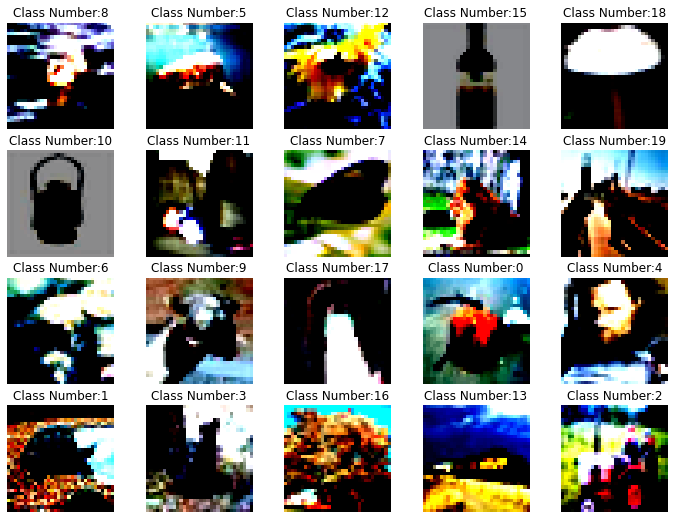

In [ ]:
import matplotlib.pyplot as plt
# X , y = data.shuffle((X,y))
plot_mnist_sample_high_res(X,y)

## Split train test

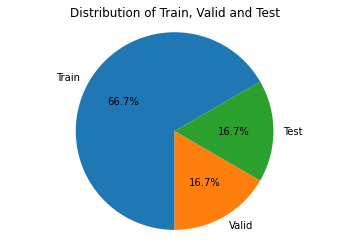

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Train', 'Valid', 'Test']
sizes = [len(X), len(Xvalid), len(Xtest)]

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title("Distribution of Train, Valid and Test")
plt.show()

## Train Dist

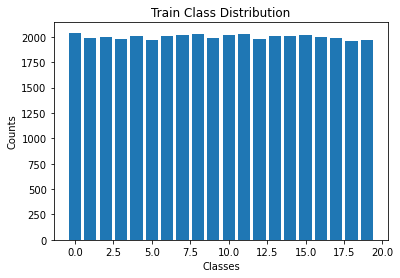

In [ ]:
# TRAIN
import collections
class_counts = dict(collections.Counter(util.onehot_decode(y)))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Train Class Distribution')
plt.show()

## Test Dist

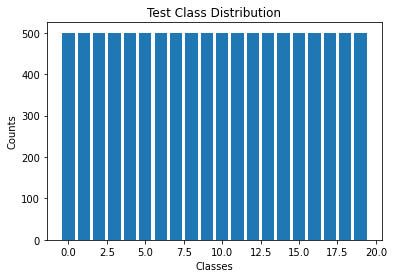

In [ ]:
# TRAIN
import collections
class_counts = dict(collections.Counter(util.onehot_decode(ytest)))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Test Class Distribution')
plt.show()

## All Dist

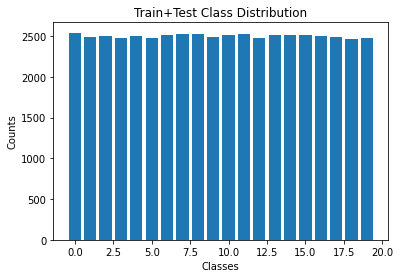

In [ ]:
# TRAIN
import collections
tmpy = list(util.onehot_decode(y))
tmpytest = list(util.onehot_decode(ytest))
tmpy.extend(tmpytest)
class_counts = dict(collections.Counter(tmpy))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Train+Test Class Distribution')
plt.show()

## Mean and STD

In [ ]:
import pickle
import constants

def loadRawData():
  path = "/content/drive/MyDrive/CSE251B/PA2/PA2_starter/data"
  def unpickle(file):
    
      with open(file, 'rb') as fo:
          dict = pickle.load(fo, encoding='bytes')
      return dict
  cifar_path = os.path.join(path, constants.cifar100_directory)
  train_images = []
  train_labels = []
  val_images = []
  val_labels = []
  images_dict = unpickle(os.path.join(cifar_path, "train"))
  data = images_dict[b'data']
  label = images_dict[b'coarse_labels']
  train_labels.extend(label)
  train_images.extend(data)
  train_images = np.array(train_images)
  train_labels = np.array(train_labels).reshape((len(train_labels),-1))
  train_images, train_labels, val_images, val_labels = util.createTrainValSplit(train_images,train_labels)
  return train_images[69], train_labels[69]

40000
(40000, 3072) (40000, 1) (10000, 3072) (10000, 1)


In [ ]:
UNX , UNy = loadRawData()
print("BEFORE NORMALIZATION\n")
print("Mean of whole row:")
print(np.mean(UNX))

print("std of whole row:")
print(np.std(UNX))

R = UNX[:1024]
G = UNX[1024:2048]
B = UNX[2048:]

print("Mean per Channel:")
print(np.mean(R))
print(np.mean(G))
print(np.mean(B))

print("STD per Channel:")
print(np.std(R))
print(np.std(G))
print(np.std(B))

print("\nAFTER NORMALIZATION\n")
UNX = util.normalize_data(UNX.reshape(1,-1))
print("Mean of whole row:")
print(np.mean(UNX))

print("std of whole row:")
print(np.std(UNX))

R = UNX[:,:1024]
G = UNX[:,1024:2048]
B = UNX[:,2048:]

print("Mean per Channel:")
print(np.mean(R))
print(np.mean(G))
print(np.mean(B))

print("STD per Channel:")
print(np.std(R))
print(np.std(G))
print(np.std(B))

40000
(40000, 3072) (40000, 1) (10000, 3072) (10000, 1)
BEFORE NORMALIZATION

Mean of whole row:
83.53580729166667
std of whole row:
40.73719308113324
Mean per Channel:
91.91015625
91.431640625
67.265625
STD per Channel:
43.38733315266779
36.167784121312295
37.29335970027875

AFTER NORMALIZATION

Mean of whole row:
9.25185853854297e-18
std of whole row:
1.0
Mean per Channel:
1.3877787807814457e-17
0.0
1.3877787807814457e-17
STD per Channel:
1.0
0.9999999999999999
0.9999999999999999


# README
# Multilayer Neural Network only using numpy

In this assignment, we were handed a classification task to perform on the CIFAR-100 dataset. Unlike the previous assignment, we did not implement logistic regression and softmax regression, but instead we used multi-layer neural networks with a softmax output activation function, just because we are dealing with a multi-class classification task. We will not be using the full 100 classes that the dataset offers, but we will only restrict ourselves to 20 target labels, which are the 20 superclasses of the dataset. In the last part of the problem we just experimented with 100 classes but this was not the focus of the assignment. We started out with a 2 layer network, ie, an input layer, a hidden layer and an output layer, with the hidden layer having a tanh activation function and the output layer having a softmax activation function. Then throughout the problem improved the accuracy by changing the architecture of the model. We started by adding momentum, then regularization, then we moved on to experimenting with different hidden activation functions, and finally increased the number of hidden layers of the networks. The last task, was to use our best network found throughout the process, and train it onto the 100 classes and check its performance. Let us now walk you through our results and interesting findings. In short, we started with normalizing the data using z normalization, which is popular when dealing with images as training data (we will explain it in depth later), and passed it through a neural network of 2 layers, tanh and softmax activation functions and a momentum of 0.9, we first got an accuracy percent score of 24.46%. We then started improving it, we added  regularization term, which was another hyperparameter that we tuned, and set it finally to 0.01, this improved our accuracy to 24.74%. Next, we experimented with sigmoid and ReLU activation functions for hidden layers which got us 24.17% and 27.84% accuracy respectively. This can be explained by ReLU being simple and effective in not firing up all units simultaneously which leads to better learning and better convergence. Next, we changed the network topology, by first halving the number of hidden units, this reduced our accuracy to 25.73% , which was expected because there is less ‘learning’ happening. Then we doubled the original number of hidden units, and this bumped our accuracy to 28.21%, which was also expected. After that, we kept the number of parameters same, but increasing the number of layers of the overall network, which got us an accuracy of 27.97%. Finally, we projected our best network found throughout this whole process and tried it on the original 100 classes of the CIFAR-100 dataset, this reduced our accuracy to 17.55%.

## How to run
### Step 1: Install dependencies
`pip install -r requirements.txt`

### Step 2: Download data, if not aldready present.
Run the shell file named: get_cifar100data.sh
You may refer the internet to know how to run it on your respective OS/Platforms.\
This will download the data into the data folder.\
Make sure your file structure looks something like the following:\
![File Tree Structure](readmePics/fileTreeStructure.png)

### Step 3: Running the neural network (main.py)
To change any hyperparameter or the architecture of the neural network, the only thing you need to change is the config file present in the config folder.

The config file is pretty self-explanatory. (For Eg. You can add or remove the layers, by directly changing the layer_specs array and mentioning the number of nodes/neurons a layer would have)

To run training directly how the config file is setup, run the following command from the cmd line:
`python main.py --experiment run_as_is`
This command will start training the neural network on 20 course class labels with hyperparameters and network architecture from the config file.

If you wanna run the network on 100 fine labels, use the following command:\
`python main.py --experiment run_as_is_100`\
Just make sure to have 100 at the end in layer_specs array in the config file because this indicates the network how many classes will it predict.


There are some defauts we have set according to our problem statement which can be ran using the command line as follows:
1. `python main.py --experiment test_gradients`

    a. This command executes a gradient check by comparing what the delta after one propagation should be according to our neural network V/S Mathematically. It will print out a table showing the results. To learn more about it refer our report on this assignment.
2. `python main.py --experiment test_momentum`

    a. This command executes the neural network with a momentum term of gamma = 0.9
3. `python main.py --experiment test_regularization`

    a. This command introduces a regularization term using L2 regularization of lambda = 0.01
4. `python main.py --experiment test_activation`

    a. This command runs the neural network on ReLU and sigmoid as hidden layer activation function. Our code supports tanh, ReLU, sigmoid as activation functions which can be edited from the config file.
5. `python main.py --experiment test_hidden_units`

    a. There are two parts to this command. The first part runs the neural network on half the number of hidden units i.e. the units drops to 64 instead of 128.
    
    b. Next, we double the number of hidden units to 256, and run the NN on it.
6. `python main.py --experiment test_hidden_layers`

    a. This will add an additional hidden layer to the architecture making it 2 hidden layer of 128 units each and one output layer.
7. `python main.py --experiment test_hidden_layers`

    a. This will run our best tuned model we could find using hyperparameterized tuning and the best activation function too on 100 fine classes instead of 20 coarse.

Each of this case has been explained in detail in the report, and we also explain the reason according to us why is the accuracies increasing or decreasing.

Also note, each of the command except check_gradients will result in a plot and it will be automatically stored in the plots folder.






## PA2-Starter (Problem Statement)

1. main.py is the driver code that has to be run in order to run different set of experiments
2. run get_cifar100data.sh to download the data. The dataset will be downloaded in 'data' directory 
3. config files need to be in the 'config' directory
4. You are free to create new functions, change existing function
signatures, add/remove member variables/functions in the provided classes but you need to maintain the overall given structure 
of the code. Specifically, you have to mandatorily use the classes provided in neuralnet.py to create your model (although, 
like already mentioned, you can  add or remove variables/functions in these classes or change the function signatures)
5. We have marked sections to be implemented by you as TODO for your convenience
